# NYPD_Allegations

#### This portfolio is a detailed analysis of Civil Complaints Review Board (CCRB) complaints made against the NYPD between 1985 and 2020. 

#### The portfolio is split into two sections

All complaints
- this is an investigation into the total number of complaints that have been registed by the CCRB - this includes both substantiated and unsubstantiated complaints made by members of the public.

Substantiated complaints 
- This is an investigation into the number of complaints that have been investigated (by the NYPD) and resulted in some sort of disciplinary action by the NYPD.



Throughout the portfolio are some explanations that discuss key aspects of the data or visualization.

Any questions, comments or tips or ideas for futher analysis can be forwarded to my email. jordan.creenaune@gmail.com

Data taken from

NYPD database - https://www1.nyc.gov/site/ccrb/policy/data-transparency-initiative-mos.page#complaint_sub 

Gothamist Article on NYPD complaint data - https://gothamist.com/news/nypd-police-ccrb-database-shows-confirmed-record-misconduct 

In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
nypd_allegations = pd.read_csv("/Users/jordan/Documents/GitHub/NYPD_allegations/allegations.csv")

#A snapshot of the data.
nypd_allegations.head(3)

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)


In [3]:
#Description of code - introductory exploration 
nypd_allegations.describe()


,unique_mos_id,complaint_id,month_received,year_received,month_closed,year_closed,mos_age_incident,complainant_age_incident,precinct
count,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,28546.000000,33334.000000
mean,18169.912495,23905.058217,6.323551,2010.726782,6.470772,2011.525661,32.346873,32.484201,64.365213
std,9566.316896,11954.434138,3.362951,6.034725,3.343372,6.085907,6.040944,28.408963,31.451592
min,2.000000,517.000000,1.000000,1985.000000,1.000000,1985.000000,20.000000,-4301.000000,0.000000
25%,9671.000000,13684.750000,3.000000,2007.000000,4.000000,2008.000000,28.000000,23.000000,43.000000
50%,19215.000000,25132.000000,6.000000,2012.000000,6.000000,2013.000000,31.000000,30.000000,67.000000
75%,25412.000000,34252.000000,9.000000,2016.000000,9.000000,2016.000000,36.000000,41.000000,81.000000
max,36374.000000,43703.000000,12.000000,2020.000000,12.000000,2020.000000,60.000000,101.000000,1000.000000


In [4]:
#When isolating a single officer to check duplicates

officer_example = nypd_allegations[nypd_allegations["unique_mos_id"] == 9984] 
officer_example 

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
33345,9984,Hassan,Paris,078 PCT,9410,6,2005,9,2005,078 PCT,...,26,Hispanic,Male,27.0,Force,Physical force,78.0,Parking violation,Parking summons issued,Unsubstantiated
33346,9984,Hassan,Paris,078 PCT,9410,6,2005,9,2005,078 PCT,...,26,Hispanic,Male,27.0,Abuse of Authority,Threat of arrest,78.0,Parking violation,Parking summons issued,Exonerated
33347,9984,Hassan,Paris,078 PCT,9410,6,2005,9,2005,078 PCT,...,26,Hispanic,Male,27.0,Discourtesy,Word,78.0,Parking violation,Parking summons issued,Unsubstantiated
33348,9984,Hassan,Paris,078 PCT,42835,7,2019,5,2020,078 PCT,...,40,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
33349,9984,Hassan,Paris,078 PCT,42835,7,2019,5,2020,078 PCT,...,40,Black,Female,38.0,Abuse of Authority,Threat of summons,78.0,Report-domestic dispute,No arrest made or summons issued,Exonerated
33350,9984,Hassan,Paris,078 PCT,42835,7,2019,5,2020,078 PCT,...,40,Black,Female,38.0,Abuse of Authority,Threat of arrest,78.0,Report-domestic dispute,No arrest made or summons issued,Exonerated
33351,9984,Hassan,Paris,078 PCT,42835,7,2019,5,2020,078 PCT,...,40,Black,Female,38.0,Abuse of Authority,Property damaged,78.0,Report-domestic dispute,No arrest made or summons issued,Exonerated


The above code attemps to discover duplicates in the data. What is evident here is that althought dates, mos_id, names and complaint_id are identical, it is clear that the individual lodging the complain has put forward multiple allegations under the same incident. An example above indicates that under one incident the officer was alleged under the following complaints, abuse of authority and discourtesy in the same incident. Note that there are still substantiated, exonerated and unsubstantiated complaints within this dataset.

In [5]:
#Check duplicates of columns 

clean = nypd_allegations[nypd_allegations[['first_name', 'last_name', 'complaint_id','allegation']].duplicated() == True]

#Find out how many duplicates have been deleted. 
#allegations_row_count = nypd_allegations.shape[0]
clean1_count_row = clean.shape[0]


print("This demonstrates that there are",clean1_count_row," rows in this data set that are duplicate events, involving, same name, complaint Id and allegation.")

This demonstrates that there are 1984  rows in this data set that are duplicate events, involving, same name, complaint Id and allegation.


In [6]:
#Check duplicates of columns 

#duplicates have been deleted from the df 
nypd_allegations = nypd_allegations[nypd_allegations[['first_name', 'last_name', 'complaint_id','allegation']].duplicated() == False]

#Find out how many rows have now been kept 
allegations_row_count = nypd_allegations.shape[0]


print(allegations_row_count,"Rows of data have been kept. They are different allegations. Please note that some complaints come from the same incident, as the person lodging the complaint has made several different allegations during the same incident")

31374 Rows of data have been kept. They are different allegations. Please note that some complaints come from the same incident, as the person lodging the complaint has made several different allegations during the same incident


### All complaints
### Data 1 = Age 
- First we will investigate age data of all complaints made against police officers from 1985 - 2020.

<IPython.core.display.Javascript object>


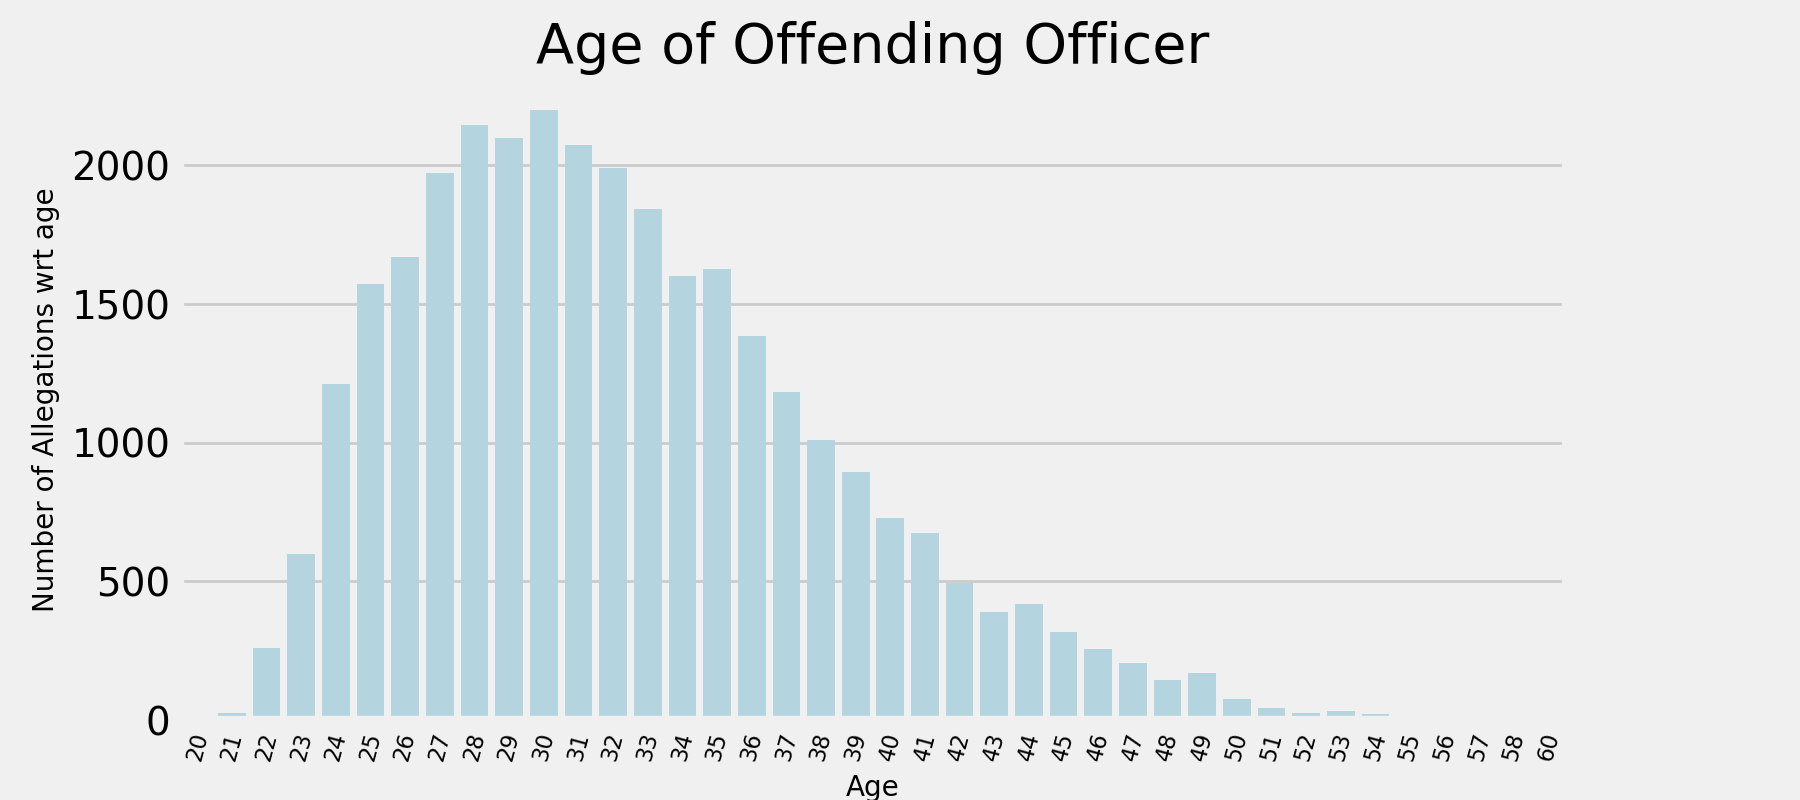

/Users/jordan/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(block=None)>

In [7]:
#age of officers - breakdown 
#plt.figure(1)

nypd_allegations_cleaned = nypd_allegations[nypd_allegations.mos_age_incident != '(null)']

off_age_clean = pd.to_numeric(nypd_allegations_cleaned['mos_age_incident'])
#Plotting histogram
plt.style.use('fivethirtyeight')


plt.figure(figsize=(9,4))
sns.countplot(off_age_clean.astype(int),color ='lightblue')
plt.title("Age of Offending Officer", fontsize = 20)
plt.xlabel('Age', fontsize = 10)

plt.xticks(fontsize = 8, rotation = 75)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.87, top=0.9)

plt.ylabel('Number of Allegations wrt age', fontsize = 10)
plt.show

The above visualisation details the age of the officers in question who have had complaints made against them. From this data we note that the age with the greatest number of complaints is 30 and a gradual decline as the age of the officer increases. This is based on a total of 33358 complaints made against officers by members of the public.

There are a number of reasons as to why there is a critical mass of complaints made against officers between 27 and 34.

1. Many of these younger officers are public facing in their day to day work so face more exposure during their day to members of the public.
2. Officers are this age are somewhat new to their career and therefore inexperienced.
3. Many officers retire or leave the force quite young and later in their careers they are promoted to various roles that may not be so public facing.
4. There is a critical mass of officers that are employed between these ages. The high number of complaints is reflective of the age breakdown of the entire NYPD
5. When looking at complaint data, it must be acknowledged that some of these officers have had multiple complaints made against them, so what is seen here is not individual officers, instead, individual complaints. This will be investiated later in the notebook.

### Data 2 - All complaints - Officer race/Ethnicity


In [8]:
# Race of officers - Graph
#nypd_allegations = clean
OfficerEthnicity = nypd_allegations['mos_ethnicity']
RaceValue = OfficerEthnicity.unique()

RaceCount = OfficerEthnicity.value_counts()
RaceCount


White              16991
Hispanic            8625
Black               4631
Asian               1097
American Indian       30
Name: mos_ethnicity, dtype: int64

<IPython.core.display.Javascript object>


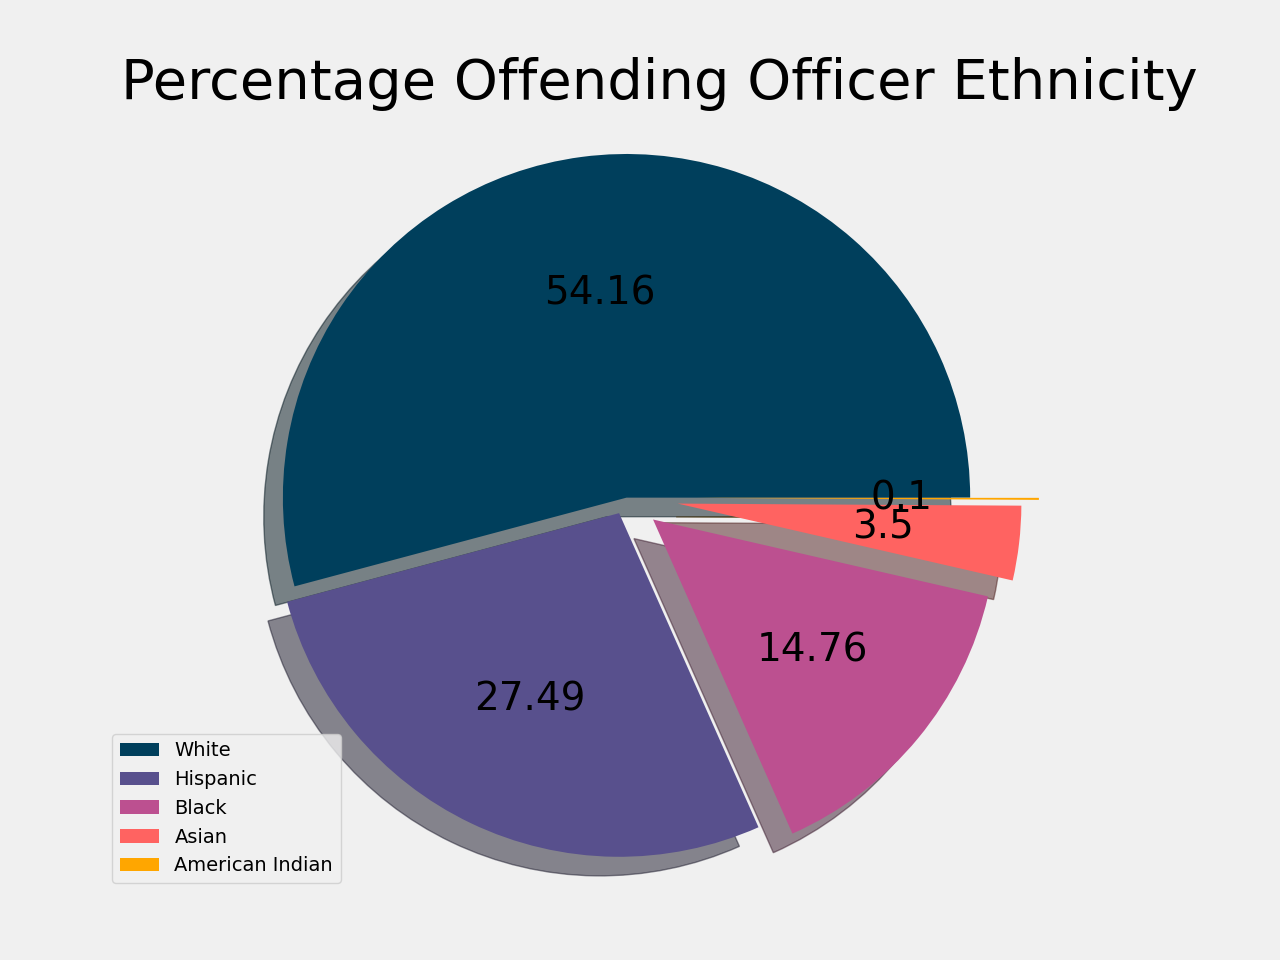

In [9]:
#This graph is a breakdown of the race of the officer receiving the complaint. 
#Please note that these are unique complaints. 
#Many officers received multiple complaints during their employment. 

suspect_ethnicity = nypd_allegations['mos_ethnicity']
ethnicity_count = suspect_ethnicity.value_counts()
ethnicity_value = suspect_ethnicity.unique()
total_rows = len(nypd_allegations)

plt.figure(2)
labels = ethnicity_value
#sizes = nypd_allegations['mos_ethnicity'].value_counts().sort_index() / total_rows*100
sizes = ((ethnicity_count / total_rows) * 100)
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return a
explode = (0, 0.05, 0.1, 0.15, 0.2)
plt.pie(sizes, colors=colors,
        autopct=absolute_value, shadow=True, explode=explode)
plt.title('Percentage Offending Officer Ethnicity')

plt.legend(labels=ethnicity_count.index,loc=3, prop={'size': 7})


plt.axis('equal')
plt.show()


The above visualisation details the racial breakdown of the police officers recieving the complaints. 54% of the 31374 complaints were made against white police officers. Followed by Hispanic police officers, 8625 or 27%, Black police officers 4631 or 14%, Asian police officers 1097 or 3% followed by American Indian 0.1% or 30 complaints.

There is an overwhelming majority of white officers with complaints made against them. Once again these are not necessarily different officers, many officers have recieved multiple complaints and quite often, individual incidents often had multiple complaints due to the complainant lodging multiple and different fado types. This data is taken from the previous 45 years, so doing a comparison between racial breakdown of the police force and these complaints is not possible due to the lack of data detailing officer race each year. What is known however is that these complaints are not proportional or comparable to racial breakdown of the city or the gender breakdown of the city which will be investigated next. This highlights wider implications on not only complaints, but also hiring practices by the NYPD and inability to attract and hire a police force that is representative of the city that it is serving.

### Data 3 - All complaints - Officer sex

In [10]:
# Gender of Member of Service
OfficerGender = nypd_allegations['mos_gender']
GenderValue = OfficerGender.unique()

GenderCount = OfficerGender.value_counts()
GenderCount

M    29696
F     1678
Name: mos_gender, dtype: int64

In [11]:
#Calculate the percentage of male vs female officer complaints

totalcount = len(nypd_allegations.index)
gender = nypd_allegations['mos_gender'].value_counts()

malepercent = ((gender.iloc[0]/totalcount)*100).round(decimals=2)
femalepercent = ((gender.iloc[1]/totalcount)*100).round(decimals=2)



print("The percentage of complaints made against male police officers is",malepercent, "and against female officers is",femalepercent)

The percentage of complaints made against male police officers is 94.65 and against female officers is 5.35


<IPython.core.display.Javascript object>


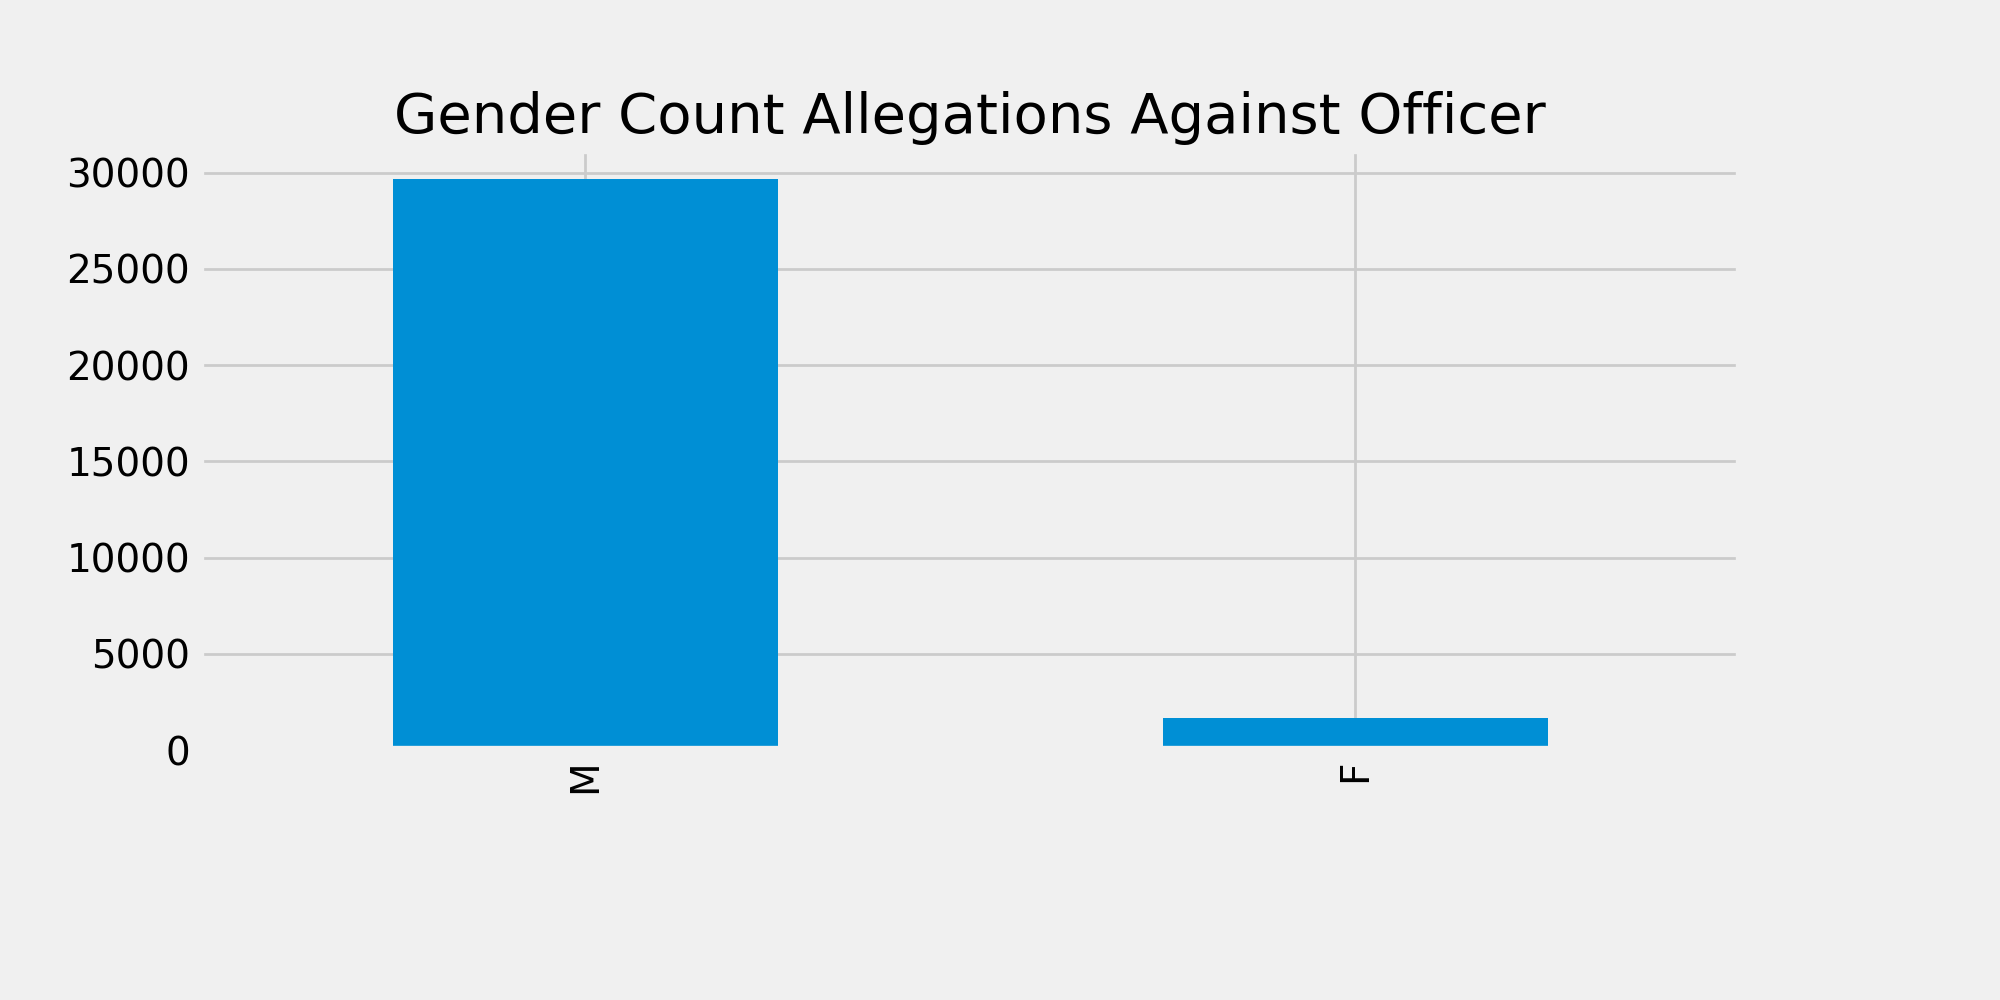

Text(0.5, 1.0, 'Gender Count Allegations Against Officer')

In [12]:
#This graph below details the Gender of the Police Officer who is receiving the complaint.
#plt.figure(5)
plt.figure(figsize=(10,5))
nypd_allegations['mos_gender'].value_counts().plot(kind='bar')
plt.subplots_adjust(left=0.1, bottom=0.25, right=0.87, top=0.85)

plt.title('Gender Count Allegations Against Officer')

The above visualisation details the sex of all complaints. What is clear here, is an overwhelming majority of the 31374 complaints have been made against male police officers. Once again this is not reflective or comparable to the sex breakdown of the NYPD as a whole nor reflective of the sex breakdown of the city of the New York. There are two concerns that this raises, one is that male police officers are more likely to commit offences that are deemed worthy of a complaint by the public, and second the lack of complaints against female officers result from better policing methods and the male female disparity of the NYPD.

What is even more alarming about this data, is the following, we begin to generate this picture of the majority of complaints of misconduct being made against a police officer who is between the ages of 27 and 34, who is white and male. This is problematic in a city like New york, the authority to protect and serve is not representative of the population with regard to race, sex or age.

As of 02/02/2021, the gender breakdown of the NYPD police force is 81% Male (28,382) and 19% Female (6,578). If allegation rates were consistent with the population of police officers the rate of allegations should be similar to the gender breakdown of the force. As the comparison between these two data sets reveals, this is not the case.

https://www1.nyc.gov/site/ccrb/policy/data-transparency-initiative-mos.page

Whilst it is difficult to compare these statistics, as complaint data was taken over the course of 45 years and we currently have a single snapshot of the sex breakdown of the NYPD we can still gauge some idea of the disparity between complaints made against male or female officers. 95% of complaints were made against male officers and 5% made against female officers. This is not necessarily representative of the current sex make up of the NYPD, one can only assume that there is an increasing amount of women on the force than there were say in the 80s and 90s. This makes the statitical comparison even more stark.

### Data 4 - All complaints - Year breakdown of complaints


In [13]:
#The following graph will give a breakdown of each year 

#Groupby and count the amount of allegations per year
date = nypd_allegations.groupby(nypd_allegations['year_received']).count()
#select first two columns of data frame using index (iloc)
date = date.iloc[:, 0:1]
#Reset column 1 to title of the column
date.reset_index(inplace=True)

<IPython.core.display.Javascript object>


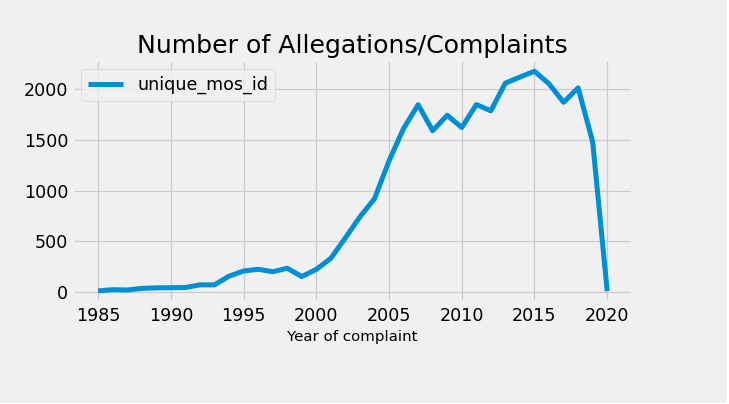

In [14]:
date.set_index('year_received').plot(figsize=(9,5), grid=True)
plt.title('Number of Allegations/Complaints')
plt.xlabel('Year of complaint', fontsize = 12)
plt.subplots_adjust(left=0.1, bottom=0.25, right=0.87, top=0.85)


This visualisation demonstrates the distribution of complaints since records began in 1985. There was a sharp increase in the early 2000s leading until today where 2020 raw data has not yet been released.

Some possible reasons may include;

1. Members of the public becoming more comfortable holding police accountable to their duty and oath to citizens of the city
2. The ease at which complaints can now be made via an online portal system
3. The increasing use of video evidence and witness testimony that is used to hold officers accountable.

### Data 5 - All complaints - Top offenders

In [15]:

#find the top 20 worst offenders - 

#Isolate three columns 
mosId = nypd_allegations.iloc[:, 0:3]
#Groupby to find total complaints of a single officer 
mosId = mosId.groupby(mosId.columns.tolist()).size().reset_index().\
    rename(columns={0:'total'})
#Sort by total column of 
Id_sort = mosId.sort_values('total',ascending = False)
Id_sort.reset_index(drop=True, inplace=True)
Idsort = Id_sort.head(20)
#Prints to markdown cell 

Idsort

,unique_mos_id,first_name,last_name,total
0,18731,Daniel,Sbarra,73
1,25861,Mathew,Reich,71
2,19489,Gary,Messina,65
3,18589,Christophe,Mccormack,64
4,22775,David,Cheesewright,57
5,25814,William,Taylor,56
6,25478,Paul,Mcmahon,54
7,20982,Mike,Civil,52
8,32054,Michael,Raso,47
9,25785,Matthew,Lewis,46



The above dataframe highlights the number of complaints made against the top 20 offending officers. The top two officers have had over 70 complaints made against them, later in this notebook, we will investigate how many of these were substantiated. A quick google search on officer Daniel Sbarra will indicate that the city has spent millions of dollars settling complaints and abuse of power by him and he has been relegated to a desk job out of public interaction.

Looking in the CCRB website and the complaint form we can gain an understanding of what it takes to actually make a complaint. Officers are required to hand over a business card if it is requested during an interaction but it is not always possible. Part of the form below will shed some light into the information used by the CCRB to identify police officers.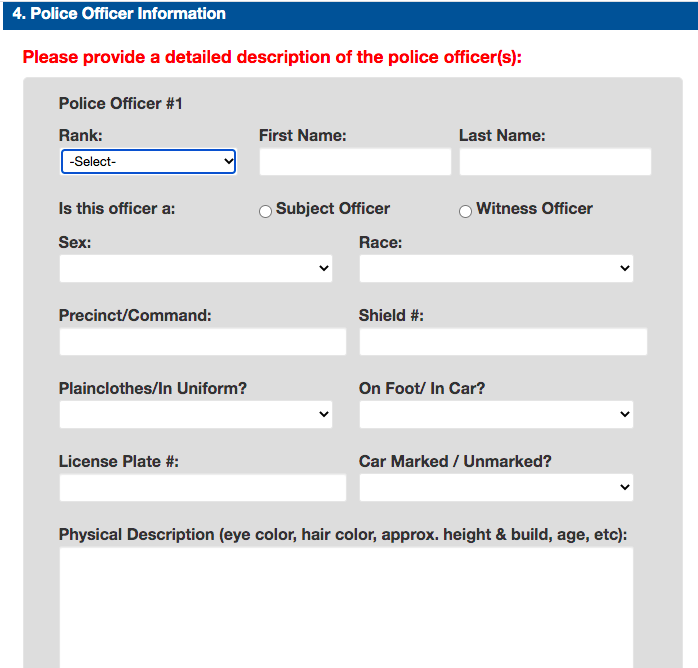

In [16]:
#Reference and isolate column detailing precinct 
PrecinctTotal = nypd_allegations.iloc[:, 22].to_frame()

#Groupby to find total complaints of each precinct, create new column with total
PrecinctTotal = PrecinctTotal.groupby(PrecinctTotal.columns.tolist()).size().reset_index().\
    rename(columns={0:'total'})

PrecinctTotal  = PrecinctTotal .sort_values('total',ascending = False)
PrecinctTotal.reset_index(drop=True, inplace=True)
PrecinctTotal = PrecinctTotal .head(20)

PrecinctTotal


,precinct,total
0,75.0,2072
1,73.0,1107
2,67.0,1064
3,44.0,1063
4,46.0,1060
5,79.0,1011
6,40.0,936
7,77.0,892
8,47.0,891
9,120.0,791


### Data 6 - All complaints - Type of complaints


<IPython.core.display.Javascript object>


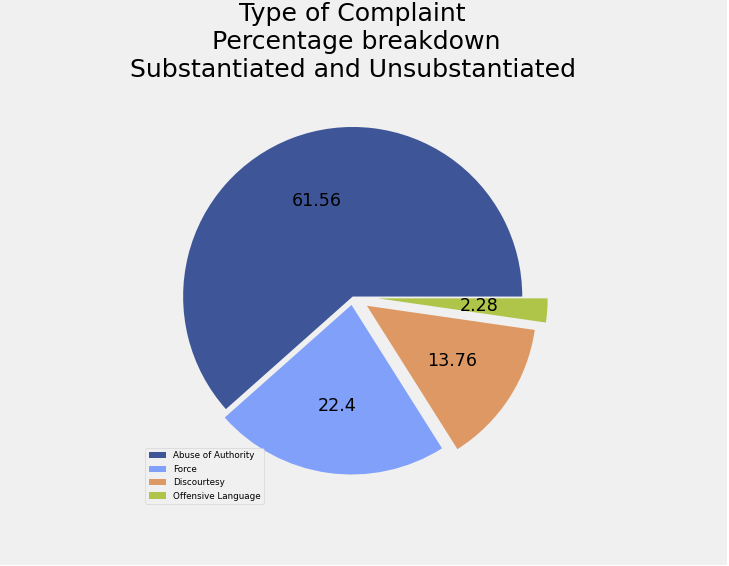

In [17]:
#Percentage Breakdown of Complaints - Substantiated and Unsubstantiated 

#Type of complaint

type_complaint = nypd_allegations['fado_type'].value_counts()
type_complaint


type_complaint = nypd_allegations['fado_type']
type_complaint_count = type_complaint.value_counts()
type_complaint_value = type_complaint.unique()
total_rows = len(nypd_allegations)

#plt.figure(7)
plt.figure(figsize=(9,7))
labels = type_complaint_value
#sizes = nypd_allegations['mos_ethnicity'].value_counts().sort_index() / total_rows*100
sizes = ((type_complaint_count / total_rows) * 100)
colors = ['#3e5698', '#80a0fa', '#de9864', '#aec549']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return a
explode = (0, 0.05, 0.1, 0.15)
plt.pie(sizes, colors=colors,
        autopct=absolute_value, explode=explode)
plt.title('Type of Complaint\n Percentage breakdown\nSubstantiated and Unsubstantiated')

plt.legend(labels=type_complaint_count.index,loc=3, prop={'size': 7})
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.87, top=0.85)

#plt.axis('equal')
plt.show()

### Data 7 - Substantiated complaints


In [18]:
#Extract the first word from the column labeled board disposition - BEWARE THIS CODE IS SLOW - 
#The product as a CSV has been written and needs to be imported. 

# SubUnsub = [nypd_allegations.board_disposition.str.split(' ')[index][0]
#              for index in range(0, len(nypd_allegations))]
# #print(SubUnsub)

# #Print to string, next, count instances of Substantiated and Unsubstantiated
# #initialise variables 
# word1 = "Substantiated"
# word2 = "Unsubstantiated"

# #Count instances of substantiated and unsubstantiated in the column
# count1 = SubUnsub.count(word1)
# count2 = SubUnsub.count(word2)


In [19]:
# Intialise data of lists - print this to data frame and save as CSV because the above code is slow
# Join ints together in one df
# data = {'Substantiated':[count1],
#         'Unsubstantiated':[count2]}
  
# # Create DataFrame
# SubUnsubdf = pd.DataFrame(data)
  
# # Print the output to csv because the above code is super slow 
# SubUnsubdf.to_csv('SubUnsubdf.csv')

In [20]:
# Import CSV with data on substantiated vs unsubstantiated 
SubUnsub = pd.read_csv("/Users/jordancreenaune/Documents/GitHub/NYPD_allegations/SubUnsubdf.csv")
#drop column 1 which was redundant 
SubUnsub.drop(['Unnamed: 0'], axis =1)

,Substantiated,Unsubstantiated
0,8301,15448


In [21]:
#need to find percentage of substantiated wrt unsub 
sub = SubUnsub['Substantiated']
unsub = SubUnsub['Unsubstantiated']

subpercentage = (sub / ((sub + unsub))*100).round(decimals=2)
print('The percentage of substantiated complaints' ,subpercentage)
ubsubpercentage = (unsub / ((sub + unsub))*100).round(decimals=2)
print('The percentage of substantiated complaints' ,ubsubpercentage)

The percentage of substantiated complaints 0    34.95
dtype: float64
The percentage of substantiated complaints 0    65.05
dtype: float64


<IPython.core.display.Javascript object>


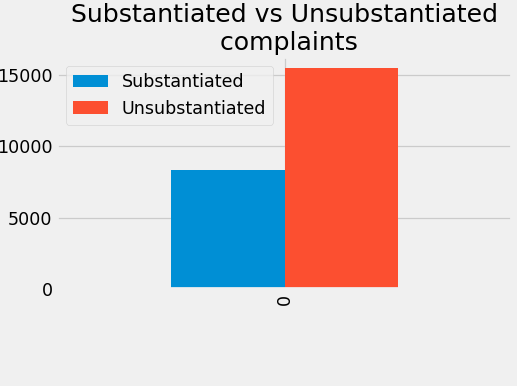

In [22]:
# Keep in mind, the complexity behind the NYPD investigating their own complaints
plt.figure(5)
SubUnsub[['Substantiated','Unsubstantiated']].plot(kind='bar')
plt.title('Substantiated vs Unsubstantiated\n complaints')
plt.subplots_adjust(left=0.11, bottom=0.25, right=0.99, top=0.85)
plt.show()

Above is a breakdown of the amount of complaints that have been made substantiated vs unsubstantiated by the CRRB. 65% of the complaints have been investigated and reported as unsubstantiated by the board. Leaving 35% of complaints substantiated, resulting in disciplinary action by the NYPD. Something to keep in mind when looking at the numbers of this analysis is the inherent problems that are associated with NYPD investigating their own allegations. There is scarce information about this, but only to be wary when looking at this data and that policies relating to their investigation should be noted. 


What the CCRB’s Conclusions Mean

Substantiated: The alleged conduct occurred and it violated the rules. (Here is a breakdown of the types of discipline the CCRB can recommend. The NYPD can choose to ignore those recommendations. It has discretion over what, if any, discipline is imposed.)

Exonerated: The alleged conduct occurred but did not violate the NYPD’s rules, which often give officers significant discretion over use of force.

Unsubstantiated: The CCRB has fully investigated but could not affirmatively conclude both that the conduct occurred and that it broke the rules.

### Data 8 - Top 5 officers with complaints


In [23]:
#Top 5 with complaints made against them - sub vs unsub 

cols = [0,1,2,25]
mosIdsub = nypd_allegations[nypd_allegations.columns[cols]]


sbarra = mosIdsub[mosIdsub["unique_mos_id"] == 18731]
Reich = mosIdsub[mosIdsub["unique_mos_id"] == 25861]
Messina = mosIdsub[mosIdsub["unique_mos_id"] == 19489]
Mccormack = mosIdsub[mosIdsub["unique_mos_id"] == 18589]
Cheesewright= mosIdsub[mosIdsub["unique_mos_id"] == 22775]


In [24]:
#Isolate Substantiated complaints and find percentage wrt to total complaints

SbarraSub = sbarra.board_disposition.str.count("Substantiated").sum() / (len(sbarra.index))*100
ReichSub = Reich.board_disposition.str.count("Substantiated").sum() / (len(Reich.index))*100
MessinaSub = Messina.board_disposition.str.count("Substantiated").sum() / (len(Messina.index))*100
MccormackSub = Mccormack.board_disposition.str.count("Substantiated").sum() / (len(Mccormack.index))*100
CheesewrightSub = Cheesewright.board_disposition.str.count("Substantiated").sum() / (len(Cheesewright.index))*100


In [25]:
top5df = {'Name': ['Sbarra','Reich','Messina','Mccormack','Cheesewright'], 
          'Percentage of substantiated': [SbarraSub,ReichSub,MessinaSub,
                                          MccormackSub, CheesewrightSub]}

top5 = pd.DataFrame(data=top5df)

print(Idsort.head(5))
top5


   unique_mos_id  first_name     last_name  total
0          18731      Daniel        Sbarra     73
1          25861      Mathew         Reich     71
2          19489        Gary       Messina     65
3          18589  Christophe     Mccormack     64
4          22775       David  Cheesewright     57


,Name,Percentage of substantiated
0,Sbarra,21.917808
1,Reich,9.859155
2,Messina,9.230769
3,Mccormack,17.187500
4,Cheesewright,24.561404


Above is listed the top 5 officers with the number of complaints made against them. These officers had between 57 and 73 complaints made against them during their career. The second data frame lists the percentages at which the officer was found guilty and a substantiated complaint was verified by the CRRB. For the majority of these officers, their complaints were marked as unsubstantiated or they were exonerated of their charges.

This once again highlights issues of CRRB and the NYPD investigating their own complaints against officers. 

A quick google search yields a significant number of articles of some of these worst offending officers, many of whom have been relegated to desk jobs and have been the subject of numerous courtcases and millions of dollars in payouts to the people of NYC. 

[Article re Officer Sbarra](https://www.dailymail.co.uk/news/article-8592689/Brooklyn-cop-cost-city-1-5million-payouts-complaints.html)

### Data 9 - Substantiated complaints - Type of complaints



In [26]:
#Isolate just substantiated complaints - note that there are a number of different tags for substantiated 

#Need to combine these two to show all substantiated complaints from all officers 
filter_list = ['Substantiated (Charges)', 'Substantiated (Command Discipline)',
               'Substantiated (Formalized Training)','Substantiated (Command Lvl Instructions)',
               'Substantiated (Command Discipline A)','Substantiated (Command Discipline B)','Substantiated (Instructions)',
               'Substantiated (MOS Unidentified)','Substantiated (No Recommendations)']
substantiated_complaints = nypd_allegations[nypd_allegations.board_disposition.isin(filter_list)]

substantiated_complaints.head()

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,26146,7,2012,9,2013,PBBS,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,40253,8,2018,2,2019,078 PCT,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


### Data 10 - Substantiated complaints, analysis and distribution


In [27]:
#Isolate substantiated complaints and plot on graph 


substantiated_type_complaint = substantiated_complaints['fado_type']
substantiated_type_complaint_count = substantiated_type_complaint.value_counts()
substantiated_type_complaint_value = substantiated_type_complaint.unique()
total_rows_sub = len(substantiated_complaints)

<IPython.core.display.Javascript object>


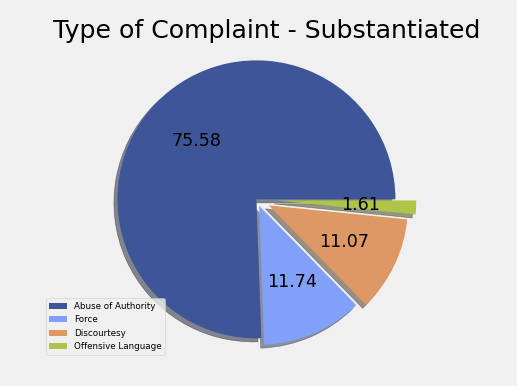

In [28]:
plt.figure(7)
labels = substantiated_type_complaint_value
#sizes = nypd_allegations['mos_ethnicity'].value_counts().sort_index() / total_rows*100
sizes = ((substantiated_type_complaint_count / total_rows_sub) * 100)
colors = ['#3e5698', '#80a0fa', '#de9864', '#aec549']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return a
explode = (0, 0.05, 0.1, 0.15)
plt.pie(sizes, colors=colors,
        autopct=absolute_value, shadow=True, explode=explode)
plt.title('Type of Complaint - Substantiated')

plt.legend(labels=type_complaint_count.index,loc=3, prop={'size': 7})


plt.axis('equal')
plt.show()


### Data 11 - Substantiated complaints complaints over time


<IPython.core.display.Javascript object>


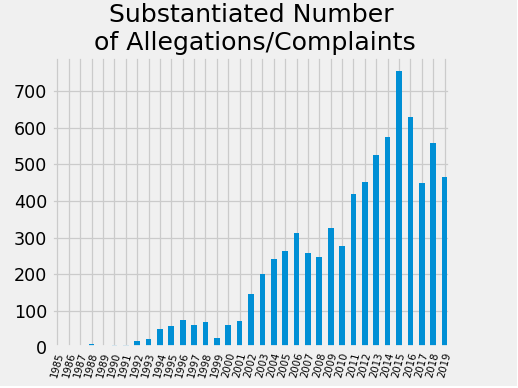

Text(0.5, 1.0, 'Substantiated Number\n of Allegations/Complaints')

In [36]:
#- Substantiated - wrt year (to see if there are more substantiated complaints now than before) 
plt.figure(8)
substantiated_complaints['year_received'].value_counts().sort_index().plot(kind='bar')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.87, top=0.85)
plt.xticks(fontsize = 8, rotation = 75)


plt.title('Substantiated Number\n of Allegations/Complaints')

This column graph above demonstrates the distribution of complaints since records have become available in 1985. There are steady trends as the years progress, with spikes in 2015, and 2016. 

<IPython.core.display.Javascript object>


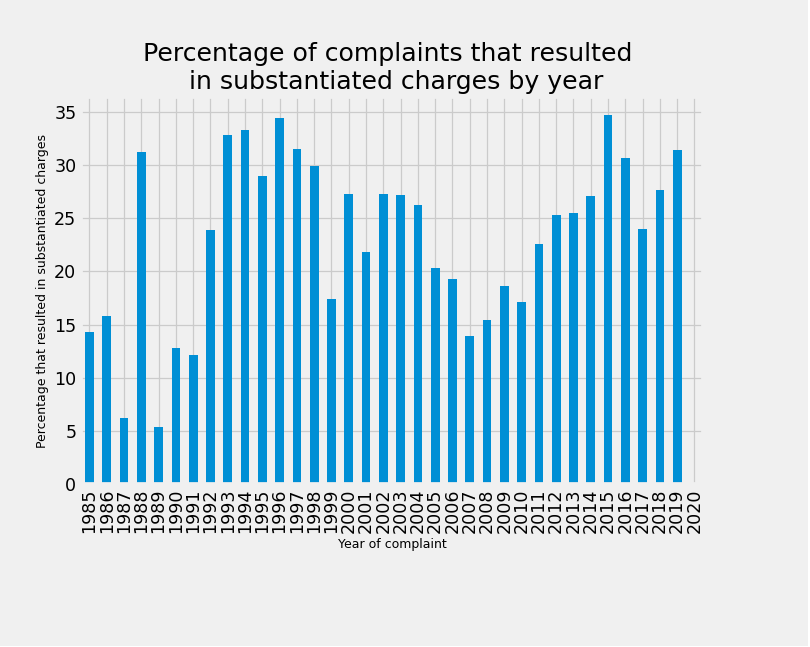

In [37]:
#- Substantiated - wrt year (to see if there are more substantiated complaints now than before) 
sub_com_group = substantiated_complaints['year_received'].value_counts().sort_index()
all_comp_group = nypd_allegations['year_received'].value_counts().sort_index()
percentage_sub = (sub_com_group / all_comp_group  )*100

plt.figure(figsize=(10, 8))#(20)

#date.set_index('year_received').plot(figsize=(9,5), grid=True)
percentage_sub.plot(kind='bar')
plt.title('Percentage of complaints that resulted \n in substantiated charges by year')
plt.xlabel('Year of complaint', fontsize = 10)
plt.ylabel('Percentage that resulted in substantiated charges', fontsize = 10)
plt.subplots_adjust(left=0.1, bottom=0.25, right=0.87, top=0.85)

### Data 12 - Substantiated complaints against male vs female officers

In [43]:
sub_m_w = substantiated_complaints['mos_gender'].value_counts()
print(sub_m_w)

M    7042
F     598
Name: mos_gender, dtype: int64


There were a total of 7042 complaints that were substantiated against male officers and 598 made against female officers that were substantiated. 

In [31]:
#Calculate the percentage of male vs female officer complaints

totalcountsub = len(substantiated_complaints.index)
gendersub = substantiated_complaints['mos_gender'].value_counts()

malepercentsub = ((gendersub.iloc[0]/totalcountsub)*100).round(decimals=2)
femalepercentsub = ((gendersub.iloc[1]/totalcountsub)*100).round(decimals=2)



print("The percentage of substantiated complaints made against male police officers is",malepercentsub, "and against female officers is",femalepercentsub)

The percentage of substantiated complaints made against male police officers is 92.17 and against female officers is 7.83


<IPython.core.display.Javascript object>


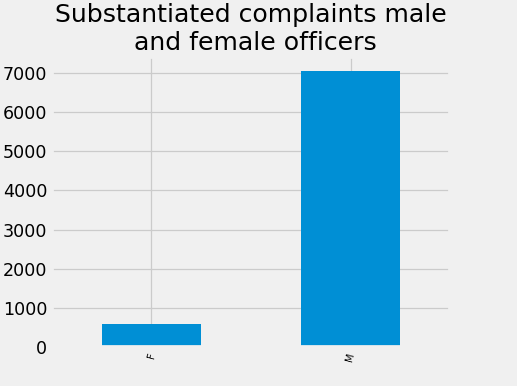

Text(0.5, 1.0, 'Substantiated complaints male\n and female officers')

In [32]:
#- Substantiated male vs female 

plt.figure(12)
substantiated_complaints['mos_gender'].value_counts().sort_index().plot(kind='bar')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.87, top=0.85)
plt.xticks(fontsize = 8, rotation = 75)
plt.title('Substantiated complaints male\n and female officers')

Similar to total complaints - Substantiated complaints make up a large percentage of the complaints made against police officers. Whilst there are many more male officers than female officers, men are way over represented in these allegations. The number of female officer enrollment is continuing to increase but not at this rate. 

### Data 13 - Substantiated complaints - Matrix Heatmap - Officer race and complainant race 

<IPython.core.display.Javascript object>


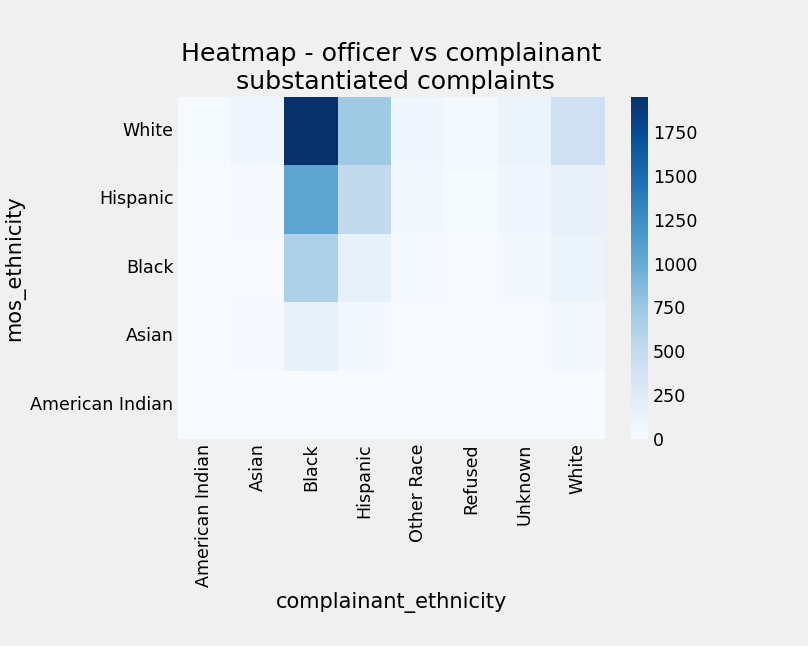

complainant_ethnicity,American Indian,Asian,Black,Hispanic,Other Race,Refused,Unknown,White
mos_ethnicity,,,,,,,,
American Indian,0,0,4,0,0,0,0,0
Asian,1,27,149,50,7,7,10,48
Black,1,11,629,156,35,11,39,113
Hispanic,1,24,1054,513,57,16,76,151
White,20,86,1950,727,72,33,113,404


In [46]:
#Correlation - between ethnicity of complainant and officer ethnicity 

RaceCorrelation = substantiated_complaints[['mos_ethnicity', 'complainant_ethnicity']]
matrix = pd.crosstab(RaceCorrelation['mos_ethnicity'], RaceCorrelation['complainant_ethnicity'])
plt.figure(figsize=(10, 8))#(20)

#plt.figure(20)
#pyplot.figure(figsize=(10, 16))

ax = sns.heatmap(matrix, cmap = 'Blues')
ax.invert_yaxis()
plt.subplots_adjust(left=0.22, bottom=0.32, right=0.88, top=0.85)
plt.yticks(rotation=0) 
plt.title('Heatmap - officer vs complainant\n substantiated complaints')

plt.show()
matrix

This matrix and heatmap demonstrates the race/ethnic background of both officers and complainants. What is clear from this heatmap is the overwhelming majority of white officers with substantiated offenses against black and hispanic citizens in New York. Other notable areas of concern include Hispanic officers and black citizens. Whilst the vast majority of NYPD officers are white, we do not see an even spread of races represented by the complainant ethnicities. This leads us to believe that there is a significant discrepancy between the way that Black and Hispanic citizens of New York are policed. 

This is the end of this project and portfolio. Please feel free to check out all allegations mapped to precincts in a separate notebook in this repo. Comments, criticisms and questions are encouraged so please feel free to email with them or ideas on further analysis. jordan.creenaune@gmail.com 

